In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
import lsst.sims.featureScheduler as fs
from lsst.sims.featureScheduler.observatory import Speed_observatory

In [12]:
survey_length = 3.1  # days
# Define what we want the final visit ratio map to look like
target_maps = fs.standard_goals()

filters = ['r', 'i']
weights = {}
weights['r'] = [1., 1., 1., 1.]
weights['i'] = [1.9, 1., 0., 1.]
surveys = []
for filtername in filters:
    bfs = []
    bfs.append(fs.Depth_percentile_basis_function(filtername=filtername))
    bfs.append(fs.Target_map_basis_function(target_map=target_maps[filtername], 
                                           filtername=filtername))
    bfs.append(fs.Filter_change_basis_function(filtername=filtername))
    bfs.append(fs.Slewtime_basis_function(filtername=filtername))
    weight = weights[filtername]
    surveys.append(fs.Simple_greedy_survey_fields(bfs, weight, filtername=filtername))

scheduler = fs.Core_scheduler(surveys)

observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler, survey_length=survey_length)

progress = 99.8%Completed 1835 observations


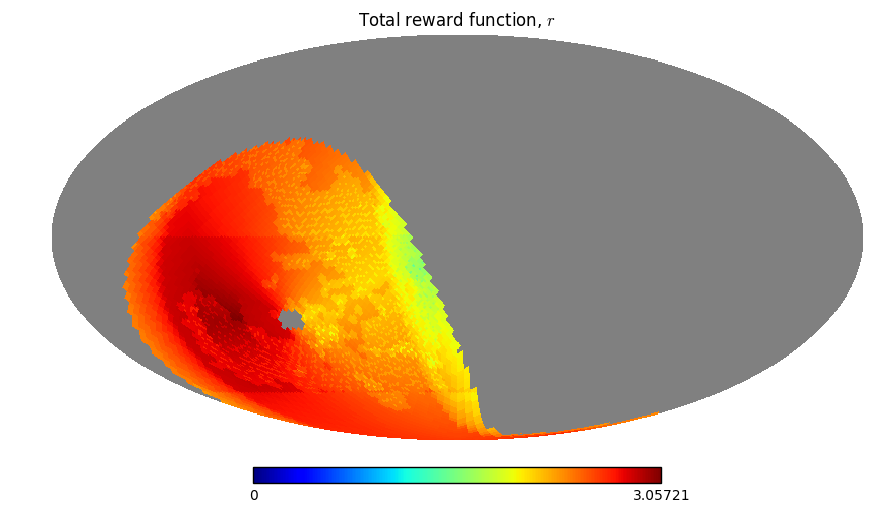

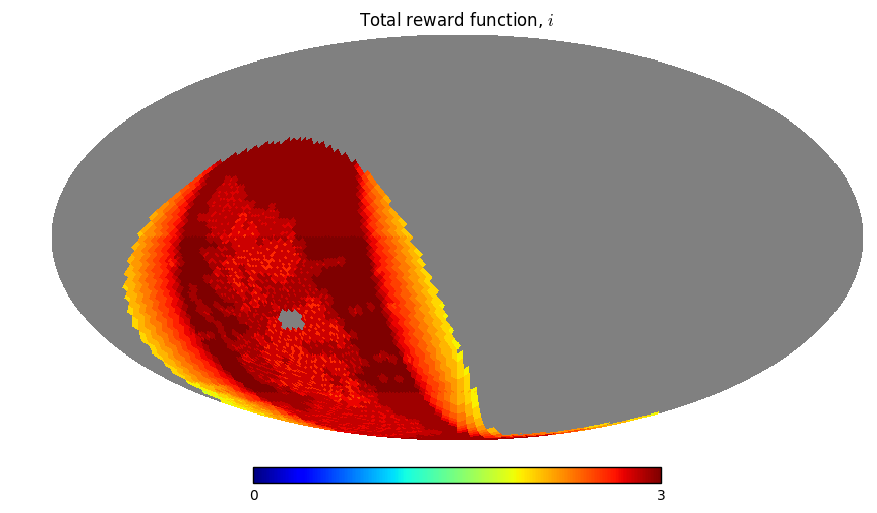

In [13]:
for fn, survey in zip(filters, scheduler.surveys):
    hp.mollview(survey.calc_reward_function(), min=0, title=r'Total reward function, $%s$' % fn)

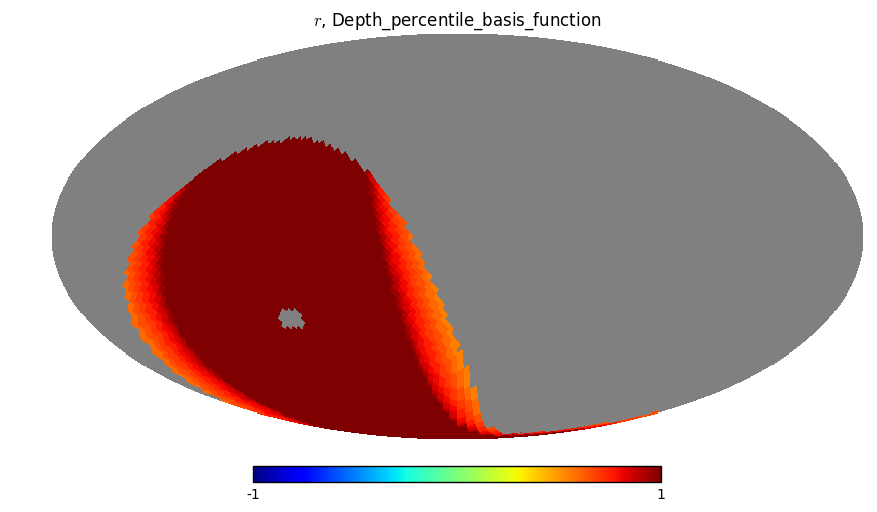

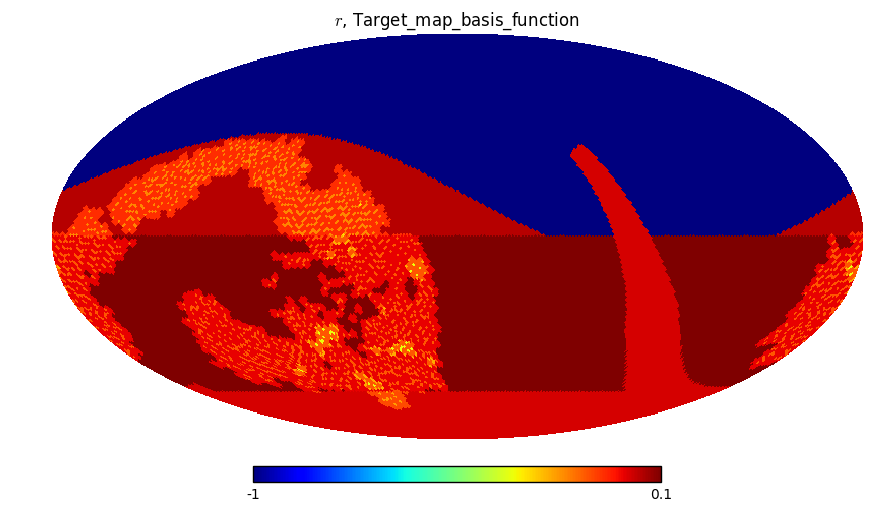

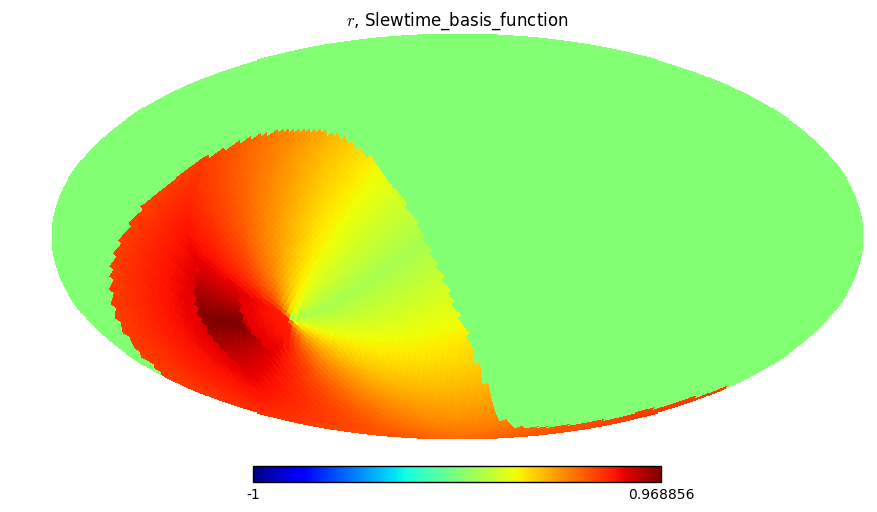

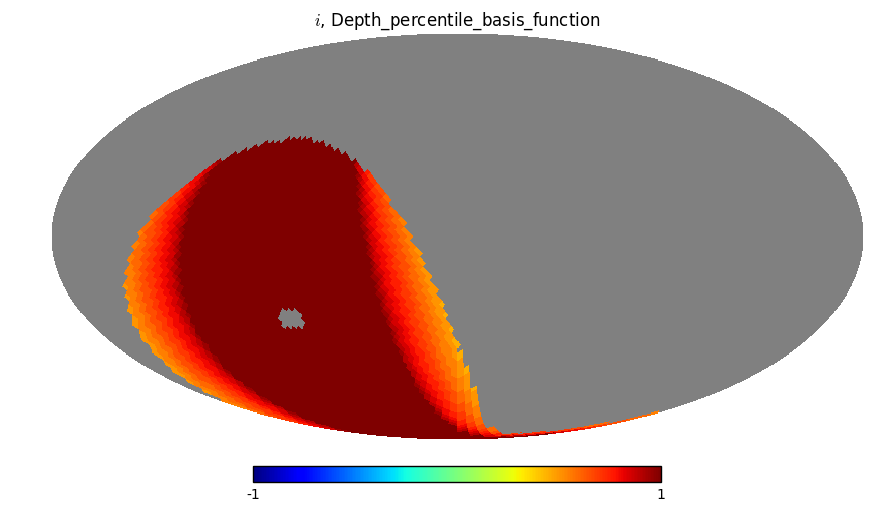

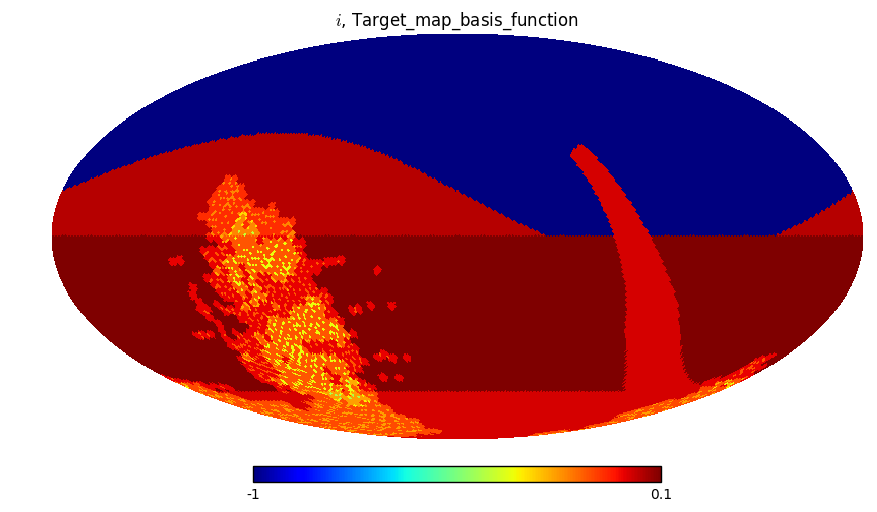

In [14]:
for fn, survey in zip(filters, scheduler.surveys):
    for basis_function in survey.basis_functions:
        reward = basis_function()
        if np.size(reward) > 1:
            hp.mollview(reward, min=-1, title='$%s$, %s' % (fn, type(basis_function).__name__.split('.')[-1]))

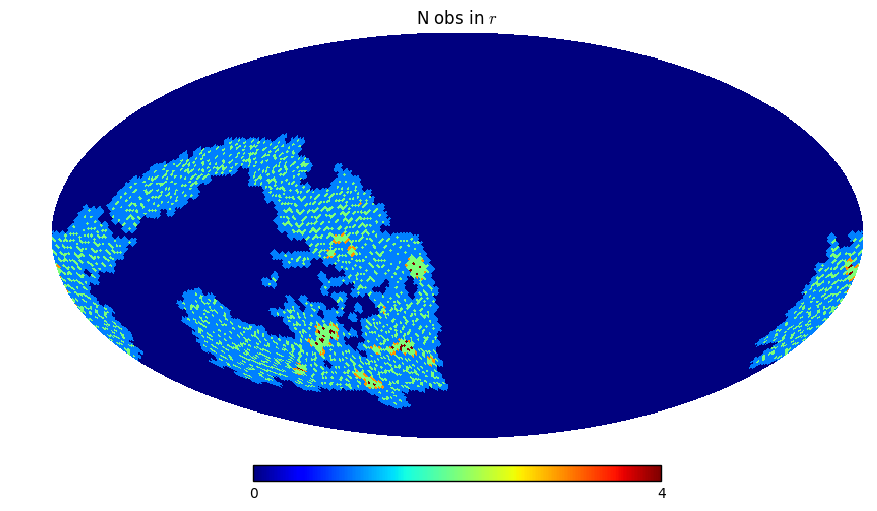

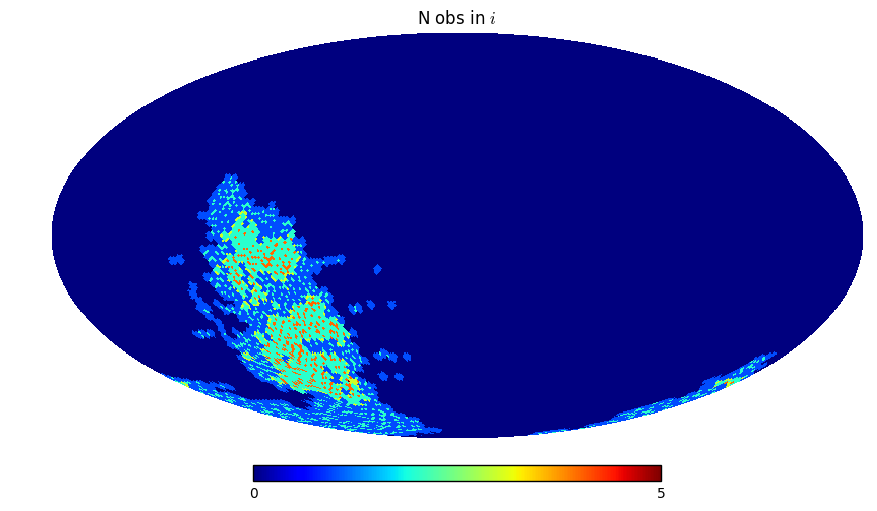

In [15]:
# Drill down to look at individual features
for fn, survey in zip(filters, scheduler.surveys):
    hp.mollview(survey.basis_functions[1].survey_features['N_obs'].feature, 
                title=r'N obs in $%s$' % fn)

In [6]:
# hp.mollview(surveys[1].basis_functions[0].condition_features['M5Depth_percentile'].feature)

In [16]:
status = observatory.return_status()
status

{'FWHMeff': array([ 0.7,  0.7,  0.7, ...,  0.7,  0.7,  0.7]),
 'RA': array([ 1.99549768]),
 'airmass': array([ -1.63750000e+30,  -1.63750000e+30,  -1.63750000e+30, ...,
          1.93533604e+00,   2.05814950e+00,   2.03938525e+00]),
 'dec': array([-0.54387625]),
 'filter': 'r',
 'last_twilight_end': 59583.05988683293,
 'lmst': array([ 5.44996265]),
 'mjd': array([ 59583.13549531]),
 'next_twilight_end': 59584.05987262761,
 'next_twilight_start': 59583.339911781266,
 'night': array([3]),
 'skybrightness': {'g': array([ -1.63750000e+30,  -1.63750000e+30,  -1.63750000e+30, ...,
           2.19461283e+01,   2.19075998e+01,   2.19101508e+01]),
  'i': array([ -1.63750000e+30,  -1.63750000e+30,  -1.63750000e+30, ...,
           1.98169978e+01,   1.97646064e+01,   1.97709716e+01]),
  'r': array([ -1.63750000e+30,  -1.63750000e+30,  -1.63750000e+30, ...,
           2.08267506e+01,   2.07808578e+01,   2.07853152e+01]),
  'u': array([ -1.63750000e+30,  -1.63750000e+30,  -1.63750000e+30, ...,
    